**Work with NOISY images**

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import random
from numpy import loadtxt
import pandas as pd
import os
from astropy.utils.data import get_pkg_data_filename
from astropy.io import fits
from astropy.visualization import simple_norm
import tensorflow as tf

In [3]:
from google.colab import auth
auth.authenticate_user()
!gcloud config set project sfhs-333010

Updated property [core/project].


In [4]:
!echo "deb http://packages.cloud.google.com/apt gcsfuse-bionic main" > /etc/apt/sources.list.d/gcsfuse.list
!curl https://packages.cloud.google.com/apt/doc/apt-key.gpg | apt-key add -
!apt -qq update
!apt -qq install gcsfuse

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2537  100  2537    0     0  63425      0 --:--:-- --:--:-- --:--:-- 63425
OK
55 packages can be upgraded. Run 'apt list --upgradable' to see them.
The following NEW packages will be installed:
  gcsfuse
0 upgraded, 1 newly installed, 0 to remove and 55 not upgraded.
Need to get 12.5 MB of archives.
After this operation, 28.5 MB of additional disk space will be used.
Selecting previously unselected package gcsfuse.
(Reading database ... 155222 files and directories currently installed.)
Preparing to unpack .../gcsfuse_0.38.0_amd64.deb ...
Unpacking gcsfuse (0.38.0) ...
Setting up gcsfuse (0.38.0) ...


In [5]:
!mkdir data
!gcsfuse --implicit-dirs tng100 data

2021/12/07 10:31:42.675343 Start gcsfuse/0.38.0 (Go version go1.17.3) for app "" using mount point: /content/data
2021/12/07 10:31:42.689312 Opening GCS connection...
2021/12/07 10:31:42.810927 Mounting file system "tng100"...
2021/12/07 10:31:42.845139 File system has been successfully mounted.


In [6]:
# load catalogs
cat_path = "/content/data/phot_TNG100_dylan_143.csv"
phot_cat = pd.read_csv(cat_path)
sfh_path = "/content/data/cats_SFH/"
wl = loadtxt('/content/data/wl.csv', delimiter=',')/10**4
"""
#index pandas table
shids = phot_cat['subhaloIDs']
phot_cat.set_index("subhaloIDs", inplace=True)
phot_cat.head()

#plot figures
fig, axs = plt.subplots(10, 3)
fig.set_size_inches(18, 30)
fig.suptitle("TNG100, no dust", fontsize=16)
for index in range(10):
    sh = int(shids[index+random.randint(0,high=len(shids)-20)])
    obj=phot_cat.loc[sh][:]
    #apparent mags
    app_mag = obj.values+5*(np.log10(20e6)-1) #assume at 20pc
    flux = 10**(.4*(-app_mag[np.array(wl)<10**3]+8.90)) #convert to Jy
    axs[index, 0].scatter(np.array(wl)[np.array(wl)<10**3],np.log10(flux),s=10)
    axs[index, 0].set_xlabel("wavelength [$\mu m$]")
    axs[index, 0].set_xscale('log')
    try:
      sfh = pd.read_csv(sfh_path+"TNG100_mainprojenitors_"+str(sh)+".csv")
    except:
      continue  
    axs[index, 0].set_ylabel("$\log(f)$ [Jy]")
    axs[index, 1].set_xlabel("Time")
    axs[index, 1].set_ylabel("SFR")
    axs[index, 1].plot(sfh.time,sfh.SFR_halfRad)
    axs[index, 2].plot(sfh.time,np.log10(sfh.Mstar_Half)+10)
    axs[index, 2].set_xlabel("Time")
    axs[index, 2].set_ylabel("Mstar")
plt.savefig("/content/data/TNG100_examples.pdf")"""

'\n#index pandas table\nshids = phot_cat[\'subhaloIDs\']\nphot_cat.set_index("subhaloIDs", inplace=True)\nphot_cat.head()\n\n#plot figures\nfig, axs = plt.subplots(10, 3)\nfig.set_size_inches(18, 30)\nfig.suptitle("TNG100, no dust", fontsize=16)\nfor index in range(10):\n    sh = int(shids[index+random.randint(0,high=len(shids)-20)])\n    obj=phot_cat.loc[sh][:]\n    #apparent mags\n    app_mag = obj.values+5*(np.log10(20e6)-1) #assume at 20pc\n    flux = 10**(.4*(-app_mag[np.array(wl)<10**3]+8.90)) #convert to Jy\n    axs[index, 0].scatter(np.array(wl)[np.array(wl)<10**3],np.log10(flux),s=10)\n    axs[index, 0].set_xlabel("wavelength [$\\mu m$]")\n    axs[index, 0].set_xscale(\'log\')\n    try:\n      sfh = pd.read_csv(sfh_path+"TNG100_mainprojenitors_"+str(sh)+".csv")\n    except:\n      continue  \n    axs[index, 0].set_ylabel("$\\log(f)$ [Jy]")\n    axs[index, 1].set_xlabel("Time")\n    axs[index, 1].set_ylabel("SFR")\n    axs[index, 1].plot(sfh.time,sfh.SFR_halfRad)\n    axs[index

**List the NOISY files**

In [7]:
print("Number of files in the g-band",len(os.listdir("/content/data/images/TNG100/sdss/sn99/Outputs/g/")))
print("Number of files in the i-band",len(os.listdir("/content/data/images/TNG100/sdss/sn99/Outputs/i/")))
print("Number of files in the r-band",len(os.listdir("/content/data/images/TNG100/sdss/sn99/Outputs/r/")))
print("Number of files in the z-band",len(os.listdir("/content/data/images/TNG100/sdss/sn99/Outputs/z/")))

Number of files in the g-band 11362
Number of files in the i-band 11366
Number of files in the r-band 11372
Number of files in the z-band 11376


In [8]:
g_band=os.listdir("/content/data/images/TNG100/sdss/sn99/Outputs/g/")

In [9]:
g_band[1]

'broadband_100_FullReal.fits_g_band_FullReal.fits'

In [10]:
def show_img(image_path,shid,band):
  """
  Displays an image (with original scaling).
  """
  image_file = image_path+'/broadband_'+str(int(shid))+"_FullReal.fits_"+band+"_band_FullReal.fits"
  image_data = fits.getdata(image_file, ext=0)
  fig=plt.figure()
  fig.suptitle("Noiseless image in "+band+" band", fontsize=16)
  plt.imshow(image_data,cmap='gray')
  plt.colorbar()
  return image_data

array([[188., 184., 184., ..., 184., 183., 196.],
       [184., 190., 194., ..., 189., 182., 180.],
       [184., 176., 180., ..., 196., 185., 191.],
       ...,
       [192., 184., 190., ..., 179., 188., 185.],
       [194., 185., 180., ..., 189., 195., 188.],
       [192., 182., 193., ..., 181., 180., 178.]])

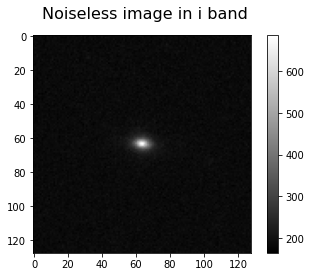

In [11]:
band="i"
image_path="/content/data/images/TNG100/sdss/sn99/Outputs/"+band
shid=100
show_img(image_path,shid,band)

Create TF dataset

In [12]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [13]:
#!tfds new tng100_images

**Correspondance snapshot number - time**

In [14]:
def correspondance_snapshot_zmerger(image_path,cat_snapshot_path,cat_merger_path):
  """
  From the ID of a galaxy in the Illustris TNG100 simulation, returns the time of the corresponding last major merger in lookback time in Gyrs
  Input: illustris_id (int): number of the galaxy in the Illustris TNG100 simulation
         catalog_snapshot(panda dataframe): dataframe containing the number of the snapshot and the corresponding time (including lookback time)
         catalog_merger_time (panda dataframe): dataframe containing the number of the snapshot corresponding to the last major merger, for each galaxy id
  Output: z (float): redshift of the last major merger
  """
  catalog_merger_time=pd.read_csv(cat_merger_path)  
  catalog_snapshot=pd.read_csv(cat_snapshot_path)
  # To adapt to the filenames
  # Here the structure of the filename is the following: 
  #dir="/content/data/images/TNG100/sdss/sn99/Outputs/g/"
  #file: dir+ broadband_number_FullReal.fits_g_band_FullReal.fits where number is the number of the galaxy and g is the band
  illustris_id=int(image_path.split("_")[1])

  num_last_merger=int(catalog_merger_time[catalog_merger_time["Illustris_ID"]==illustris_id]["SnapNumLastMajorMerger"])
  z=float(catalog_snapshot[catalog_snapshot["Snapshot"]==num_last_merger]["Redshift"])
  return z

In [15]:
def snapshot2lookbackmerger(image_path,cat_snapshot_path,cat_merger_path):
  """
  From the ID of a galaxy in the Illustris TNG100 simulation, returns the time of the corresponding last major merger in lookback time in Gyrs
  Input: illustris_id (int): number of the galaxy in the Illustris TNG100 simulation
         catalog_snapshot(panda dataframe): dataframe containing the number of the snapshot and the corresponding time (including lookback time)
         catalog_merger_time (panda dataframe): dataframe containing the number of the snapshot corresponding to the last major merger, for each galaxy id
  Output: lookback (float): lookback time in Gyrs of the last major merger
  """
  catalog_merger_time=pd.read_csv(cat_merger_path)  
  catalog_snapshot=pd.read_csv(cat_snapshot_path)
  # To adapt to the filenames
  # Here the structure of the filename is the following: 
  #dir="/content/data/images/TNG100/sdss/sn99/Outputs/g/"
  #file: dir+ broadband_number_FullReal.fits_g_band_FullReal.fits where number is the number of the galaxy and g is the band
  illustris_id=int(image_path.split("_")[1])

  num_last_merger=int(catalog_merger_time[catalog_merger_time["Illustris_ID"]==illustris_id]["SnapNumLastMajorMerger"])
  lookback=float(catalog_snapshot[catalog_snapshot["Snapshot"]==num_last_merger]["Lookback"])
  return lookback

In [17]:
cat_snapshot_path='/content/drive/MyDrive/Colab Notebooks/corresp_snapshot_lookback.csv'
cat_merger_path="/content/data/mergers/TNG100_SDSS_MajorMergers.csv"
image_path="/content/data/images/TNG100/sdss/sn99/Outputs/g/broadband_1_FullReal.fits_g_band_FullReal.fits"

snapshot2lookbackmerger(image_path,cat_snapshot_path,cat_merger_path)

4.079

**Combine all the NOISY bands into one**

In [18]:
def keep_common_filters(img_dir):
  """
  Keeps the number (=id) of the images of galaxies that are available in the four bands g,r,i,z
  Input: img_dir (str): path to the directory containing the noisy images
  Output: gal_id_kept (list of int): list of the IDs of the images available in the four bands
  """
  filters=['g','r','i','z']
  gal_id_all=[]
  for i in range(len(filters)):
    files=os.listdir(img_dir+filters[i])
    #Get the IDs of the galaxies in the NOISY files
    gal_id_all.append([int(file.split("_")[1]) for file in files])
  gal_id_kept=list(set.intersection(*[set(ids) for ids in gal_id_all]))
  return gal_id_kept

In [19]:
img_dir='/content/data/images/TNG100/sdss/sn99/Outputs/'
gal_ids=keep_common_filters(img_dir)

In [ ]:
"""img_dir='/content/data/images/TNG100/sdss/sn99/Outputs/'
for i in range(len(gal_ids)):
  try:
    stack_bands(img_dir,gal_ids[i])
  except:
    print("Problem for gal_ids",gal_ids[i])"""

In [20]:
def stack_bands(img_dir,gal_id):
  """
  For a given image path and galaxy id, stacks the four bands g,r,i,z into a single image
  Input: img_dir (str): path to the directory containing the noisy images
         gal_id (int): number of the image of galaxy for which you want to stack bands
  Output: im (numpy ndarray): resulting image with the four stacked bands
  """
  filters=['g','r','i','z']
  filenames=[img_dir+filters[i]+"/broadband_"+str(gal_id)+'_FullReal.fits_'+filters[i]+"_band_FullReal.fits" for i in range(len(filters))]
  #Stack the bands together
  im=[fits.getdata(filename, ext=0) for filename in filenames]
  im_size = min([min(i.shape) for i in im])
  im = np.stack([i[:im_size, :im_size] for i in im], axis=-1).astype('float32')
  return im

In [21]:
img_dir='/content/data/images/TNG100/sdss/sn99/Outputs/'
gal_id=10
im=stack_bands(img_dir,gal_id)

In [23]:
print(im.shape,type(im))

(128, 128, 4) <class 'numpy.ndarray'>


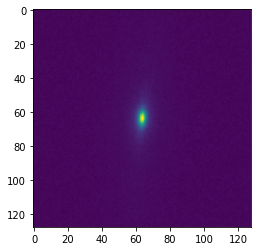

In [24]:
plt.imshow(im[:,:,3])